In [64]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [65]:
#importing dataset
df=pd.read_csv('data.csv')

In [66]:
#Checking first five data
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


Observation:

*   Dataset has x1, x2, y column
*   x1 and x2 are input
*   y is the target variable
*   It has negative values also



In [67]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


Observation:

*   Dataset has null values in x1 and x2.




**Summary Statistics**

In [68]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Observation:

*   It shows the statistics about dataset


In [69]:
#Checking null values
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [70]:
#checking nan values in each row
df[pd.isnull(df).any(axis = 1)]

,x1,x2,y
36,NaN,116.138522,1
44,-99.627522,NaN,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1092,55.162258,NaN,0
1318,NaN,53.182191,0
1430,-74.126054,NaN,0


Observation:

*   It shows the null values in each row


In [71]:
df.x1.fillna(df.x1.mean(),inplace=True)
df.x2.fillna(df.x2.mean(),inplace=True)

Observation:

*   Filling null values with mean for x1 and x2

In [72]:
#checking nan values in each row
df[pd.isnull(df).any(axis = 1)]

,x1,x2,y


In [73]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# **Visualization**

# **Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2acd1ded0>,
      dtype=object)

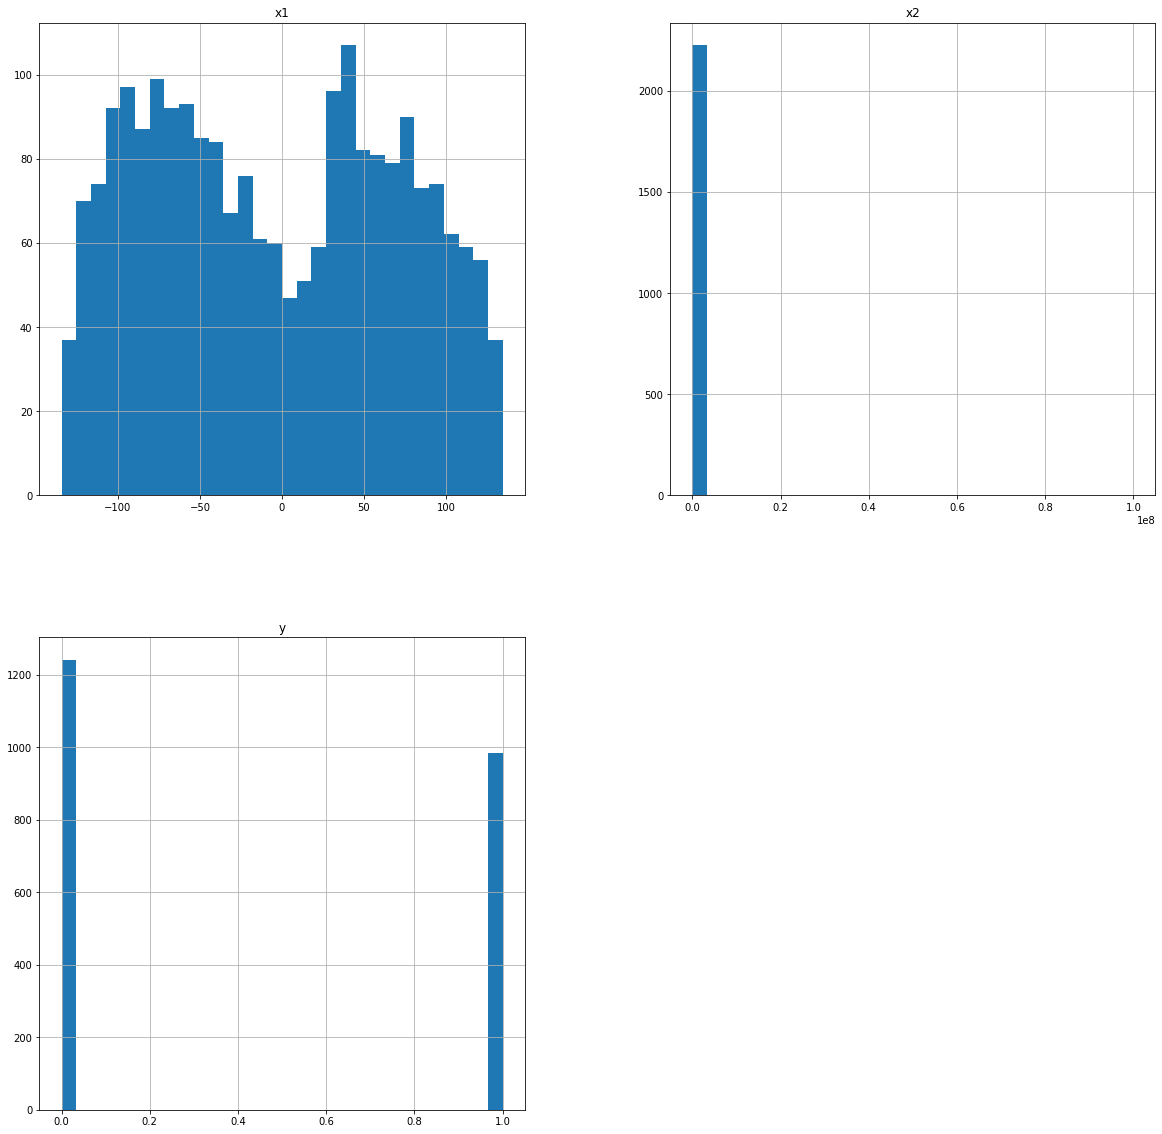

In [74]:
#Using histogram to check normal distribution
df.hist(figsize=(20,20),grid=True,bins=30)

Observation:

*   It shows the distribution of each numerical columns

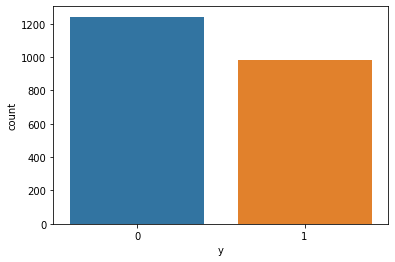

In [75]:
#visualization of target count
sns.countplot(x='y',data=df)

Observation:

*   It shows the count of target variable 'y'.
*   There are around 1200 '0' value and around 1000 '1' value.


# **Bivariate Analysis**

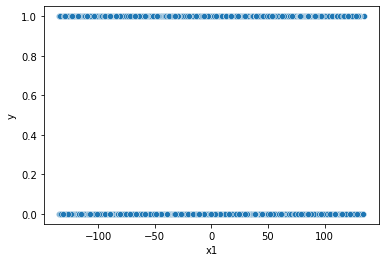

In [98]:
#visualization of x1 and y
sns.scatterplot(x='x1',y='y',data=df)

Observation:

*   Above visualization shows that x1 data are around 0 and 1.



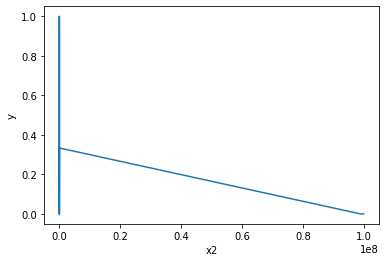

In [99]:
#visualization of x2 and y
sns.lineplot(x='x2',y='y',data=df)

Observation:

*   Above visualization shows the distribution of data between x2 and y.


# **Correlation**

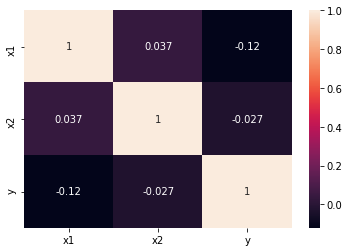

In [101]:
#checking correlation
corr=df.corr()
sns.heatmap(corr,annot=True)

Observation:

*   x1 and x2 are negatively correlated.

x1       AxesSubplot(0.125,0.71587;0.227941x0.16413)
x2    AxesSubplot(0.398529,0.71587;0.227941x0.16413)
y     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
dtype: object

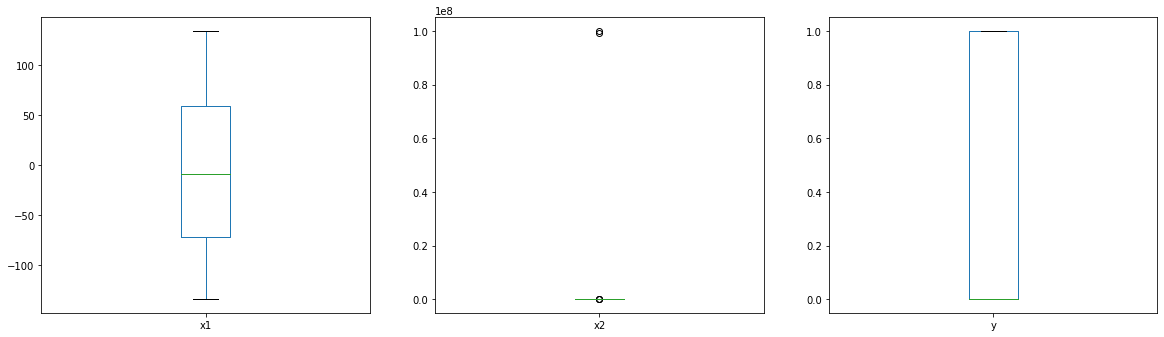

In [79]:
#Using boxplot to check outliers
df.plot(figsize=(20,25),kind='box',layout=(4,3),subplots=True)

Observation:

*   Above boxplot shows that x2 has outliers.


In [80]:
#using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(2227, 3)
(2225, 3)


Observation:

*   Used z score method to remove outliers and it removed 2 rows from dataset.

In [81]:
new_df.skew()

x1     0.074146
x2    27.172656
y      0.230889
dtype: float64

Observation:

* We are not reducing skewness because skewness reduction method changing values to null.

In [82]:
new_df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [83]:
#Assigning input and target data
X=new_df.drop(['y'],axis=1)
Y=new_df[['y']]

# **Scaling**

In [84]:
#Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX=sc.fit_transform(X)

# **Finding Best Model**

In [85]:
#importing imporant libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#importing train test split library
from sklearn.model_selection import cross_val_score, train_test_split

#importing error metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score


In [88]:
#Finding best model and random state
best_rstate_clas=0
best_accu_rate=0
models=[LogisticRegression(), DecisionTreeClassifier(), SVC(kernel ='linear', C = 1),SVC(kernel ='rbf', C = 1), KNeighborsClassifier()]
for r in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=r, stratify=Y)
    for model in models:
        model.fit(x_train,y_train)
        pred_test=model.predict(x_test)
        pred_train=model.predict(x_train)
        accu_score=accuracy_score(y_test,pred_test)
        if accu_score>best_accu_rate: 
            if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
                print("best random state",r)
                print("At random state",r)
                print("Training score :",accuracy_score(y_train,pred_train)*100)
                print("Testing score :",accuracy_score(y_test,pred_test)*100)
                print("Model : ", model)
                best_rstate_clas=r
                best_accu_rate=accu_score

best random state 2
At random state 2
Training score : 63.892617449664435
Testing score : 63.94557823129252
Model :  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best random state 11
At random state 11
Training score : 70.67114093959731
Testing score : 70.74829931972789
Model :  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best random state 11
At random state 11
Training score : 94.83221476510067
Testing score : 94.82993197278911
Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
    

Observation:

* KNeighborsClassifier is the best model compare to other models.
* It has accuracy score of 0.94 at random state 11.

# **Hyperparameter Tuning**

In [89]:
x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=11)

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

param_grid_KNC= dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gridsearch_KNC=GridSearchCV(KNeighborsClassifier(), param_grid_KNC, refit=True)
gridsearch_KNC.fit(x_train,y_train)
pred_KNC=gridsearch_KNC.predict(x_test)
KNC_best_parm=gridsearch_KNC.best_params_
print("Best Param ",gridsearch_KNC.best_params_)
print("Best estimator ",gridsearch_KNC.best_estimator_)
print("Best score ",gridsearch_KNC.best_score_)

Best Param  {'leaf_size': 1, 'n_neighbors': 7, 'p': 2}
Best estimator  KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Best score  0.9328859060402683


Observation:
* KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=7, p=2, weights='uniform') is the best parameter.


In [90]:
KC=KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
KC.fit(x_train,y_train)
pred_KC=KC.predict(x_test)
lss=accuracy_score(y_test,pred_KC)
for j in range(2,20):
    lssscore=cross_val_score(KC,ScaledX,Y,cv=j)
    lsc=lssscore.mean()
    print("At CV : ",j)
    print("cross validation score is :",lsc*100)
    print("accuracy_score is :",lss*100)
    print('\n')


At CV :  2
cross validation score is : 91.10055621271177
accuracy_score is : 94.14965986394557


At CV :  3
cross validation score is : 91.23564838559872
accuracy_score is : 94.14965986394557


At CV :  4
cross validation score is : 92.31349211474627
accuracy_score is : 94.14965986394557


At CV :  5
cross validation score is : 92.53932584269663
accuracy_score is : 94.14965986394557


At CV :  6
cross validation score is : 92.04256817464363
accuracy_score is : 94.14965986394557


At CV :  7
cross validation score is : 92.22169315318533
accuracy_score is : 94.14965986394557


At CV :  8
cross validation score is : 92.0882648719734
accuracy_score is : 94.14965986394557


At CV :  9
cross validation score is : 92.08839406207827
accuracy_score is : 94.14965986394557


At CV :  10
cross validation score is : 92.76350341372763
accuracy_score is : 94.14965986394557


At CV :  11
cross validation score is : 92.4463382298821
accuracy_score is : 94.14965986394557


At CV :  12
cross validation s

In [91]:
#Classification Report
print(classification_report(y_test,pred_KC))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       413
           1       0.95      0.92      0.93       322

    accuracy                           0.94       735
   macro avg       0.94      0.94      0.94       735
weighted avg       0.94      0.94      0.94       735



In [93]:
#Final CV score and accuracy score
lssscore_selected=cross_val_score(KC,ScaledX,Y,cv=19).mean()
print("The CV score is",lssscore_selected," \nThe accuracy score is",lss)

The CV score is 0.9280366278582157  
The accuracy score is 0.9414965986394558


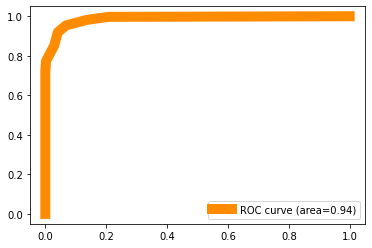

0.9390462153910938
0.9870663077316411


In [94]:
#Roc curve
from sklearn.metrics import roc_curve, roc_auc_score,auc

y_pred_prob=KC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_prob)
auc_score=roc_auc_score(y_test, pred_KC)
plt.figure
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'%auc_score)
plt.legend(loc="lower right")
plt.show()
print(auc_score)
roc_auc=auc(fpr,tpr)
print(roc_auc)

Observation:
* roc_auc score is 0.987.
* auc_score is 0.93.

In [100]:
#saving the model 
import pickle
filename='Innomatics.pkl'
pickle.dump(KC,open(filename,'wb'))

# **Conclusion**

* We did exploratory data analysis by removing columns and label encoding.

* Visualized data by univariate and bivariate analysis.

* Checked correlation and visualized using heatmap.

* Scaled the data using standard scaler method

KNeighborsClassifier is the best model with random state 11.

Performed Hyperparameter tuning for KNeighborsClassifier.

Final score of KNeighborsClassifier:

            *  CV score is 0.92
            *  Accuracy score is 0.941
            *  roc_auc score is 0.987.
Finally, Saved the model.